In [21]:
import numpy as np
import matplotlib.pyplot as plt
import json
import os, sys, glob
from collections import defaultdict

In [22]:
matches = glob.glob('average_results/**/[a-zA-Z]*_results.json', recursive=True)
matches = [a for a in matches if "secondary" not in a]

for match in matches:
    print(match)

average_results\annthyroid_results.json
average_results\breastw_results.json
average_results\cardio_results.json
average_results\ionosphere_results.json
average_results\letter_results.json
average_results\mammography_results.json
average_results\mnist_results.json
average_results\optdigits_results.json
average_results\pendigits_results.json
average_results\pima_results.json
average_results\satellite_results.json
average_results\satimage-2_results.json
average_results\thyroid_results.json
average_results\vertebral_results.json
average_results\vowels_results.json
average_results\wbc_results.json
average_results\wine_results.json


In [23]:
color_dict = {
    "fixed": "#003a7d",
    "from_scratch": "#d83034",
    "from_scratch_2": "#ff73b6",
    "from_scratch_iso": "#5ecaba",
    "ours_none": "#008dff",
    "ours_force": "#f67f00",
    "ours_diffi": "#cf23ff",
    "ours_keepsize": "#935610",
    "ours_force_diffi": "#3fa271",
    "ours_keepsize_diffi": "#c6cd00",
    "ours_force_keepsize": "#5F6D7B",
    "ours_all": "#611EA4",
    "xStream": "#024306"
    }
lines_dict = {
    "fixed": "-",
    "from_scratch": "-",
    "xStream": "-",
    "from_scratch_2": "--",
    "from_scratch_iso": "--",
    "ours_none": "--",
    "ours_force": "--",
    "ours_diffi": "--",
    "ours_keepsize": "--",
    "ours_force_diffi": "--",
    "ours_keepsize_diffi": "--",
    "ours_force_keepsize": "--",
    "ours_all": "--"
}

In [24]:
def plot_experiment_results(results, save_dir, dataset_name):

    # metric -> model -> (discrd)new_trees -> n_features -> block 

    metrics = list(results.keys())
    models_keys = list(results[metrics[0]].keys())
    
    
    for metric in metrics:
        fig, ax = plt.subplots(figsize=(12, 6))
        # each model a track [concatenate blocks in exp]
        
        title_prefix = f"{dataset_name} - {metric}"
        title_prefix = title_prefix.replace('_', ' ').title()
        x_ticks_labels_exp = None
        x_ticks_labels_blocks = None
        min_n_features = None
        for model in models_keys:
            x = []
            y = []
            model_results = results[metric][model]["n_new_trees:100"]
            # Concatenate all blocks for this model and seed
            if min_n_features is None:
                min_n_features = min([int(k.split(':')[1]) for k in model_results.keys()])
            for exp in model_results:
                block_lengths = list(model_results[exp].keys())
                x.extend(sorted([int(block.split(':')[1]) for block in block_lengths]))
                y.extend([model_results[exp][block] for block in block_lengths])

            y = np.array(y)
            if "time" in metric:
                y = y * 1000  # Convert to milliseconds if it's a time metric

            if x_ticks_labels_blocks is None:
                x_ticks_labels_blocks = [str(v) for v in x]
            if x_ticks_labels_exp is None:
                x_ticks_labels_exp = []
                i=min_n_features
                for val in x:
                    if val == x[0]:
                        x_ticks_labels_exp.append(str(i))
                        i += 1
                    else:
                        x_ticks_labels_exp.append("")
                
            ax.plot(y, label=model, color=color_dict[model], linestyle=lines_dict[model])
                

        ax.set_xlabel("Training Set Length")
        ax.set_xticks(np.arange(len(y)))
        ax.set_xlim((0, len(y) - 1))
        ax.set_xticklabels(x_ticks_labels_blocks, rotation=45)
        ax.set_ylabel(metric.replace('_', ' ').title() + (" [ms]" if "time" in metric else " [a.u.]"))
        ax.legend(loc='upper left', bbox_to_anchor=(0, 1))
        ax.set_title(title_prefix)
        ax.grid(True, linewidth=0.1)
            # second x axis
        ax_twiny = ax.twiny()
        ax_twiny.set_xticklabels(x_ticks_labels_exp)
            # allign with the other axis
        ax_twiny.set_xlim(ax.get_xlim())
        ax_twiny.set_xticks(ax.get_xticks())
        ax_twiny.set_xticklabels(x_ticks_labels_exp)
        ax_twiny.tick_params(axis='x', bottom=False, top=True)
        ticks = ax_twiny.xaxis.get_major_ticks()
        for i,tick in enumerate(ticks):
            if x_ticks_labels_exp[i] == "":
                tick.tick2line.set_visible(False)
                tick.label2.set_visible(False)
        ax_twiny.set_xlabel("Number of Features")
        fig.savefig(
            os.path.join(save_dir, f"{title_prefix}.pdf"), 
            bbox_inches='tight',
            format='pdf'
        )

C:\Users\matti\AppData\Local\Temp\ipykernel_21700\1528173883.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_twiny.set_xticklabels(x_ticks_labels_exp)
C:\Users\matti\AppData\Local\Temp\ipykernel_21700\1528173883.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_twiny.set_xticklabels(x_ticks_labels_exp)
C:\Users\matti\AppData\Local\Temp\ipykernel_21700\1528173883.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_twiny.set_xticklabels(x_ticks_labels_exp)
C:\Users\matti\AppData\Local\Temp\ipykernel_21700\1528173883.py:59: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax_twiny.set_xticklabels(x_ticks_labels_exp)
C:\Users\matti\AppData\Local

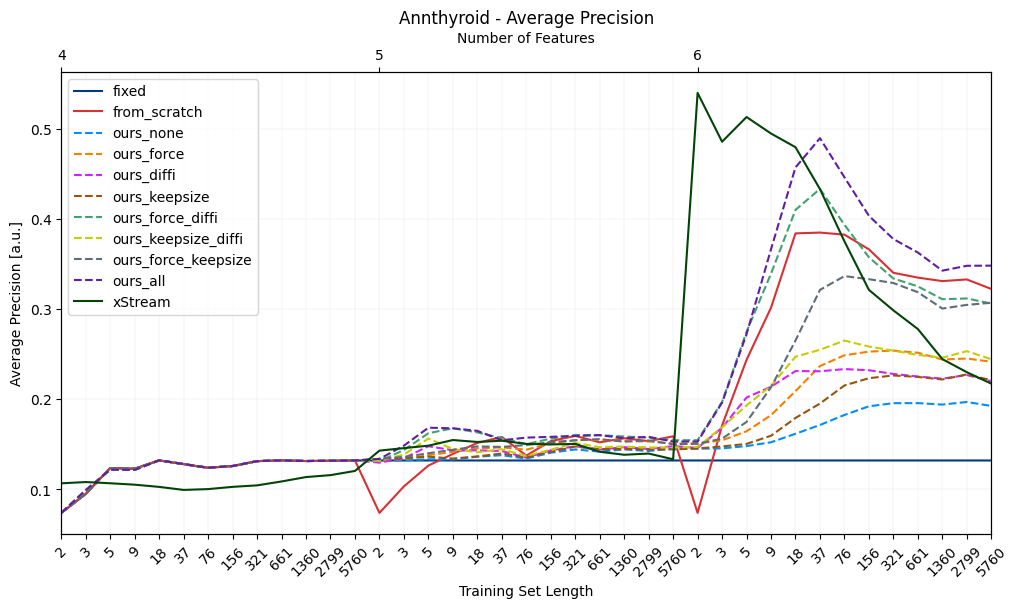

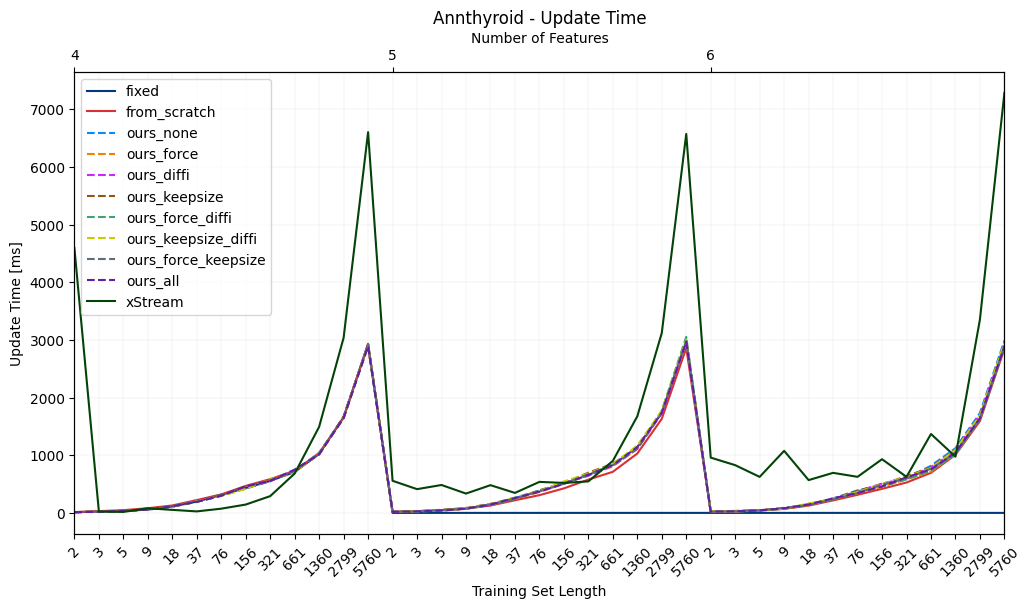

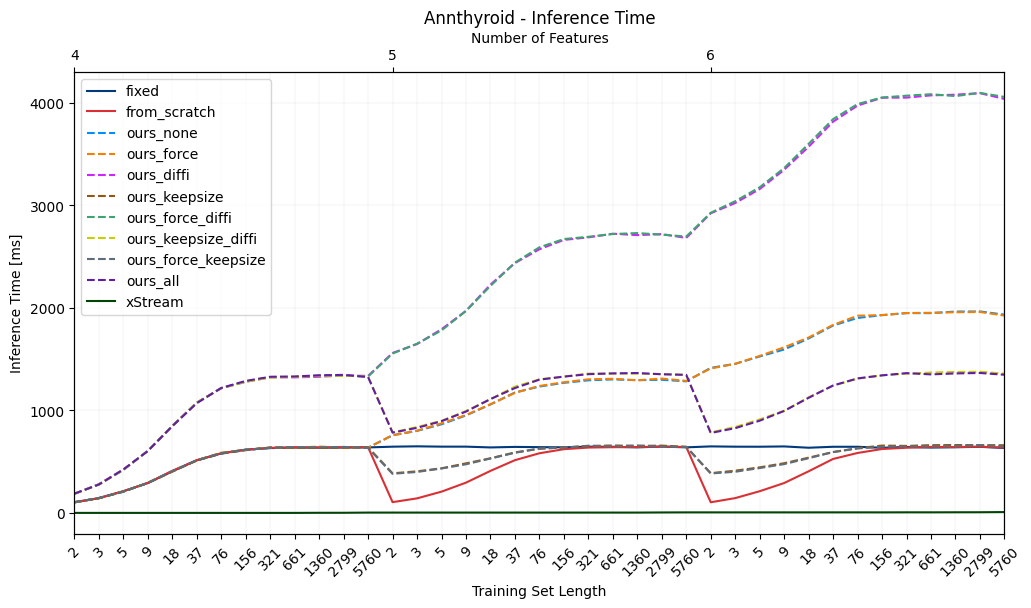

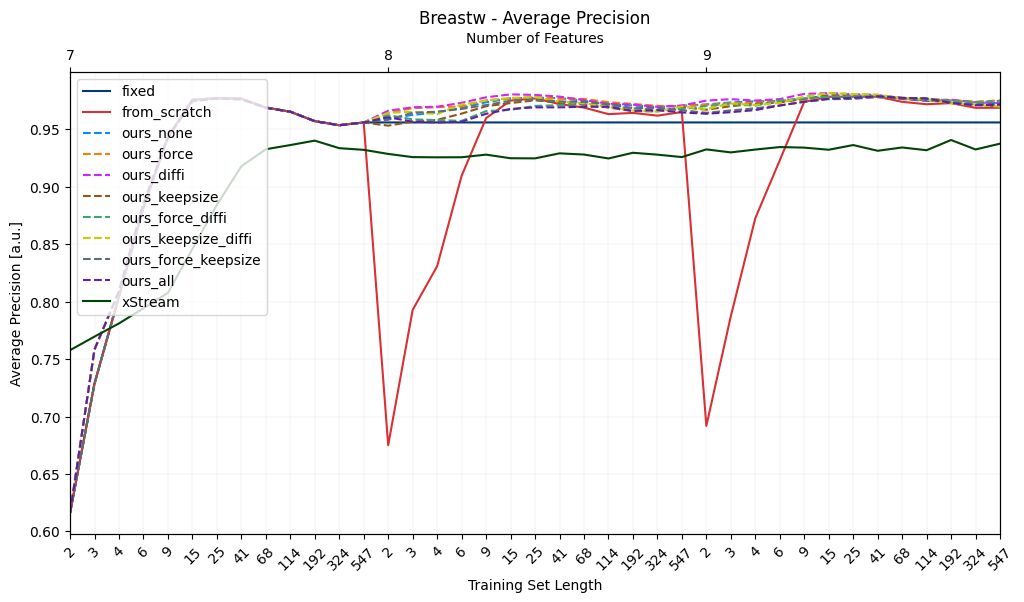

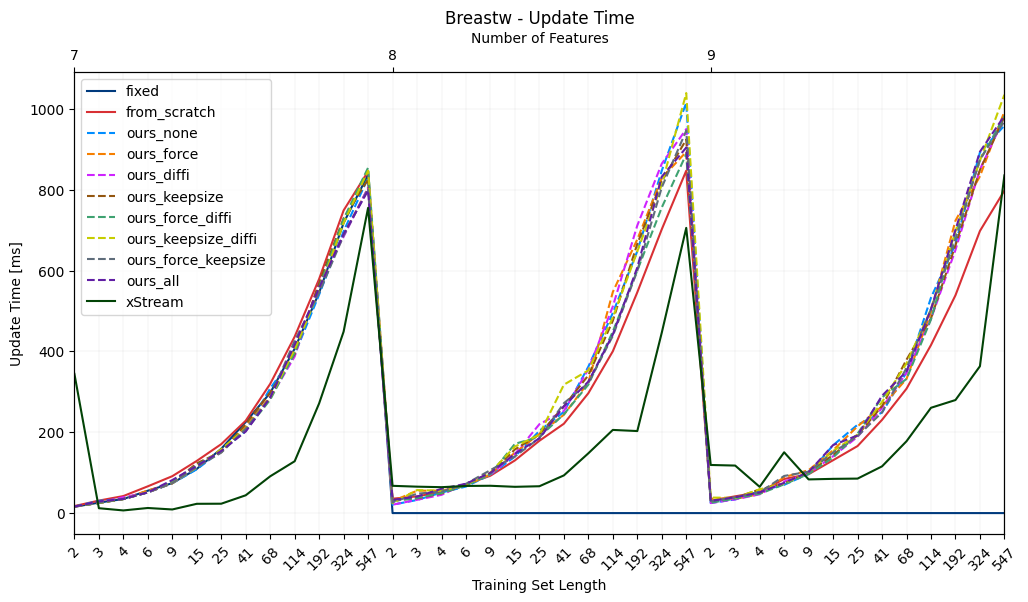

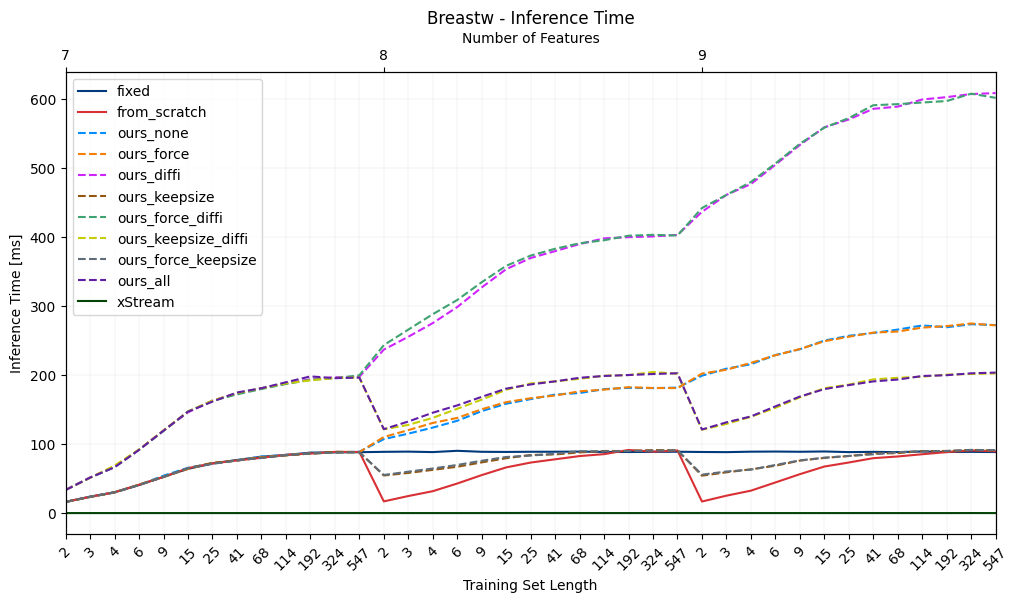

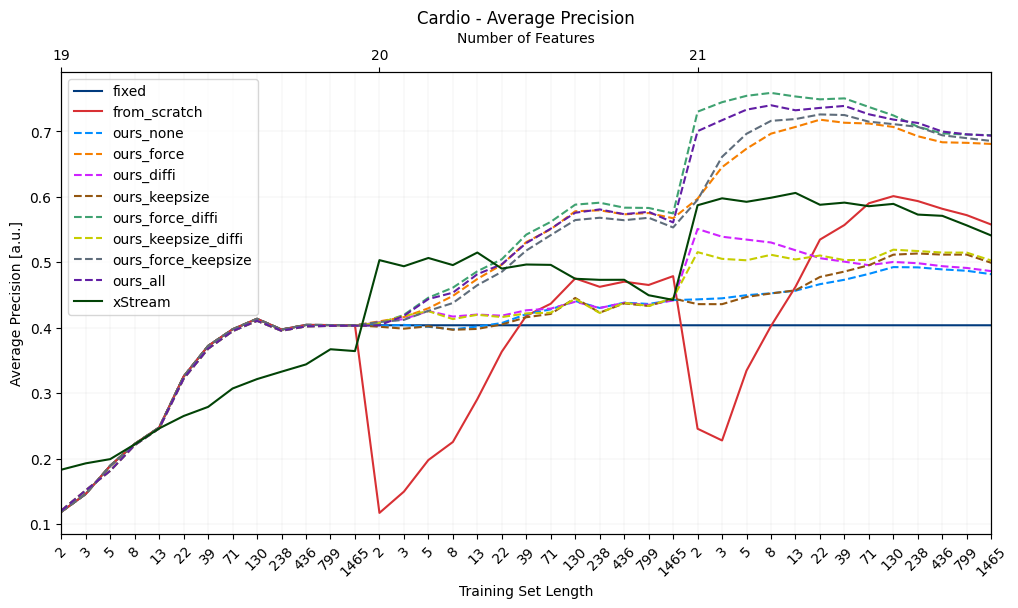

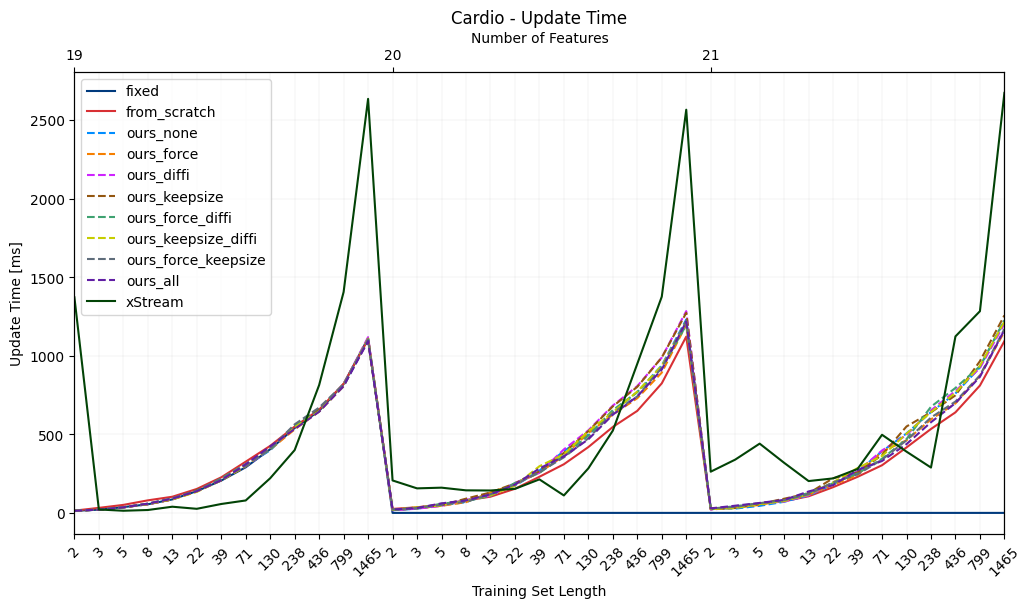

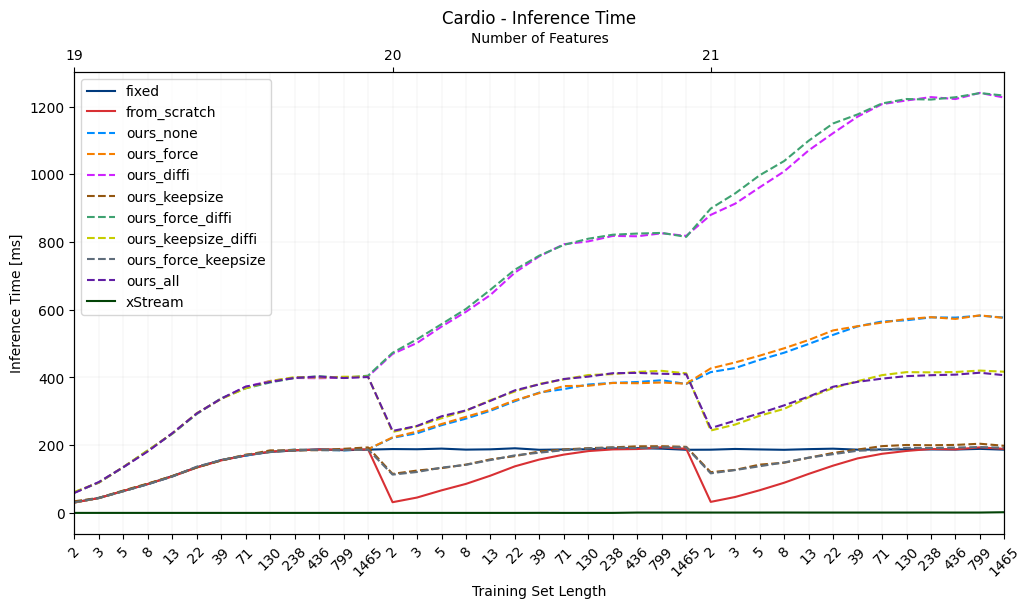

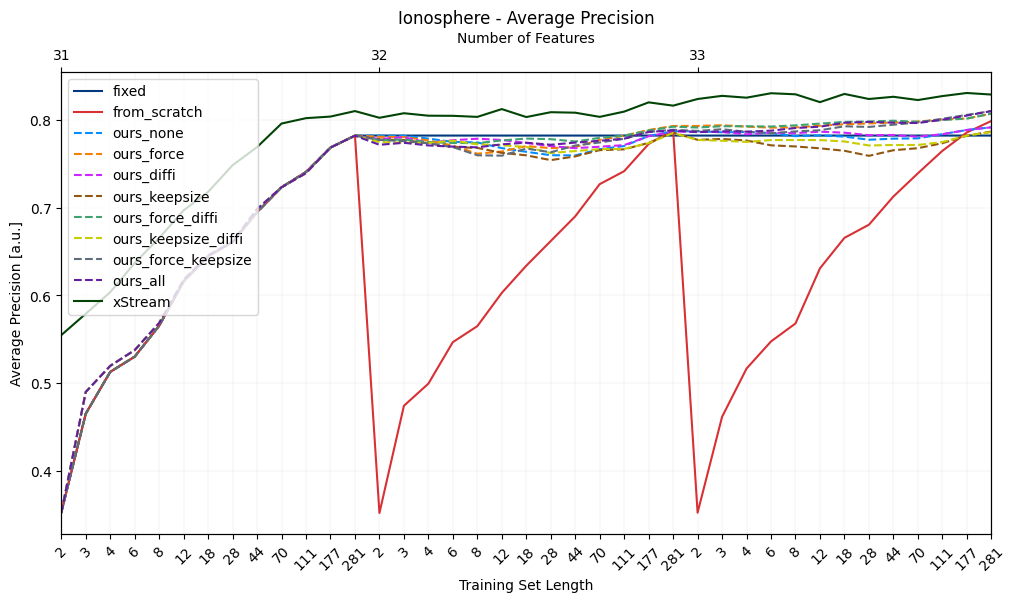

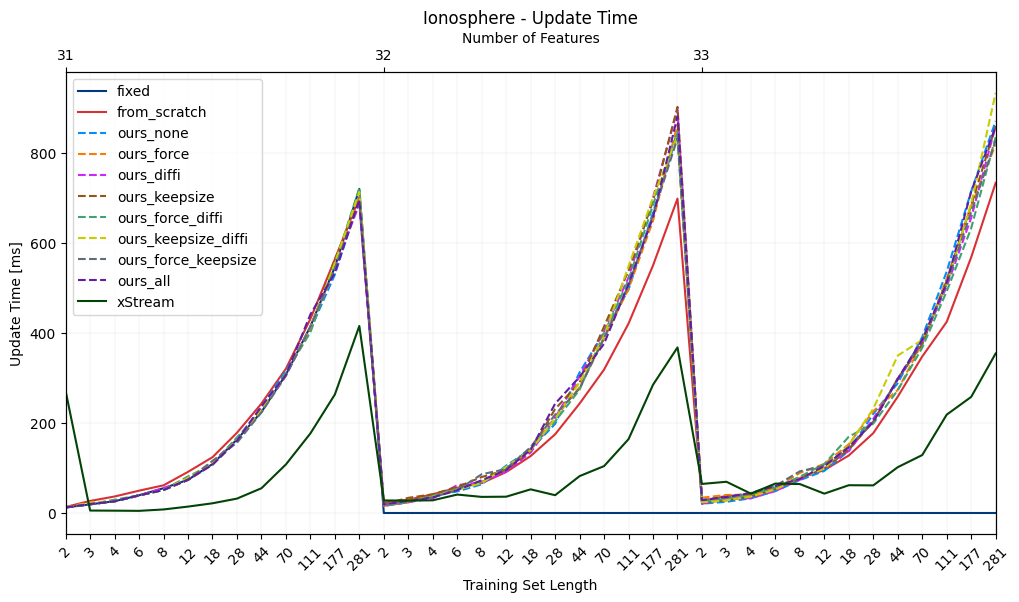

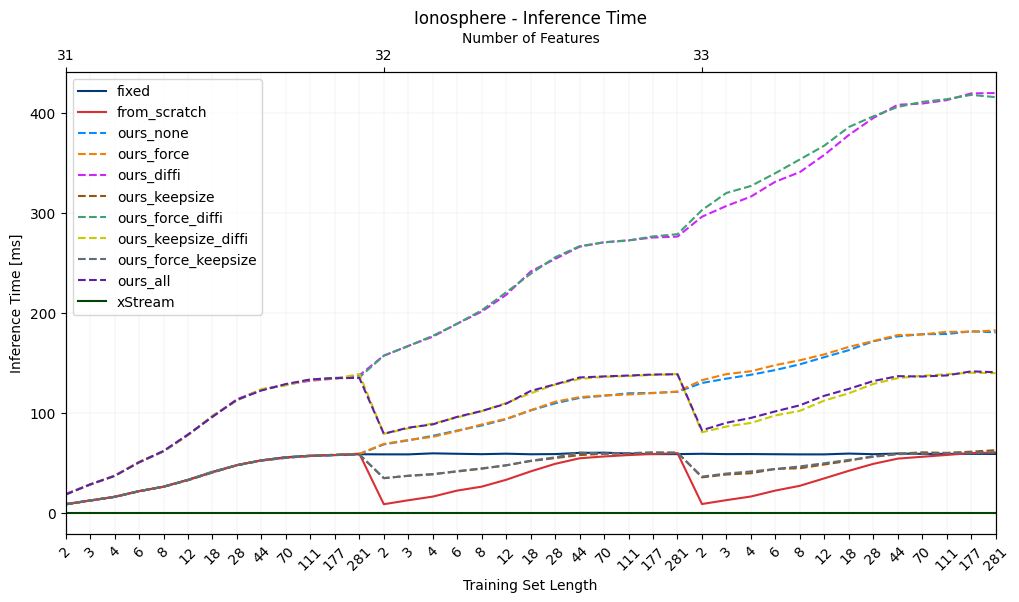

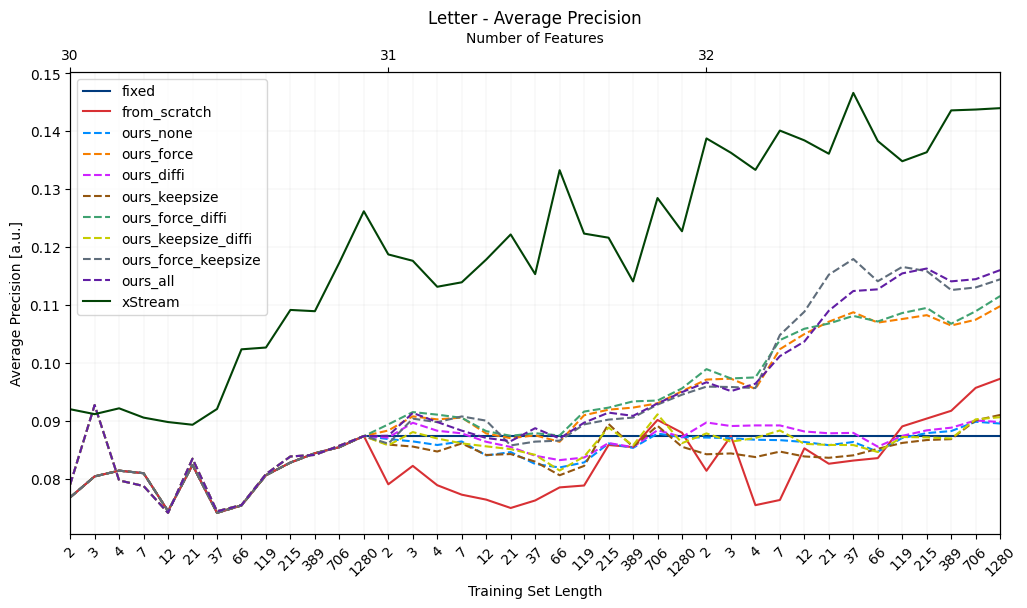

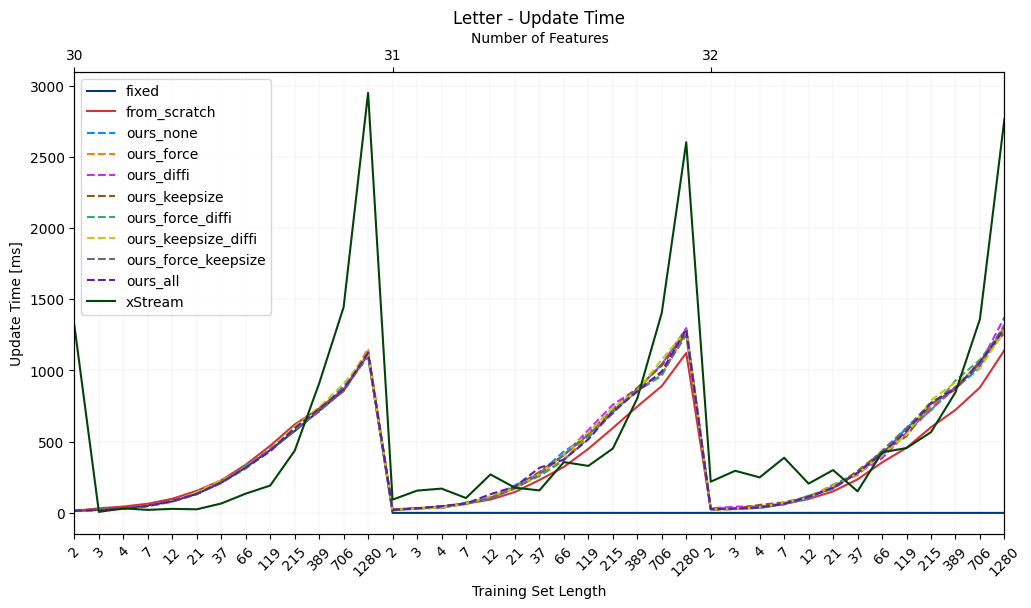

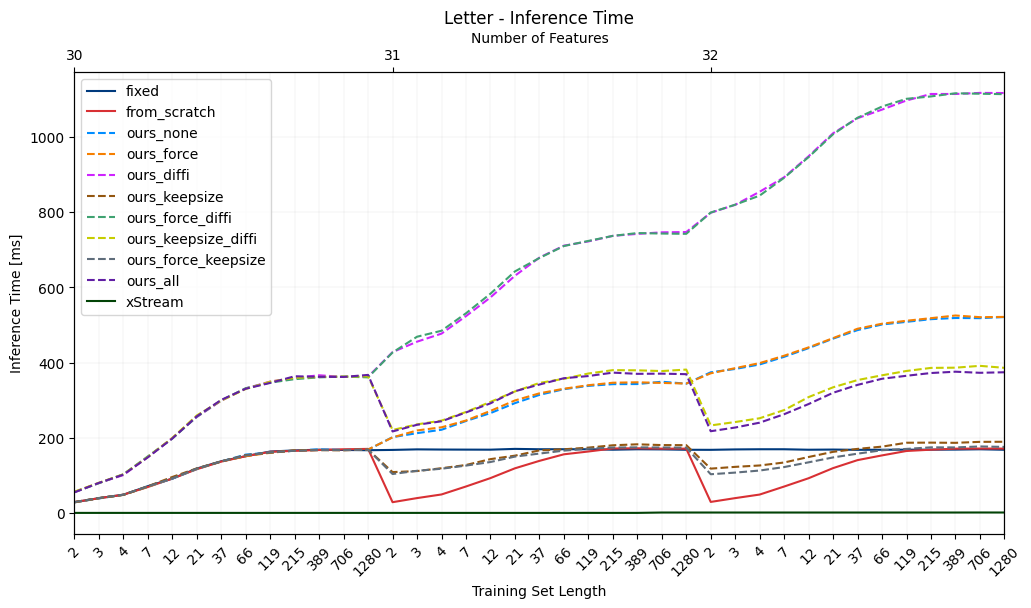

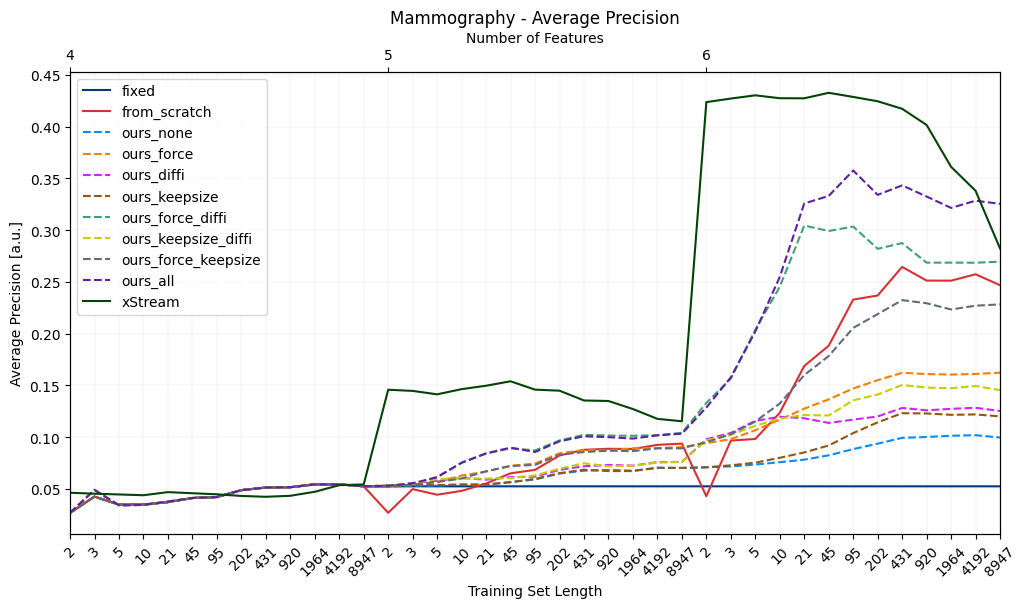

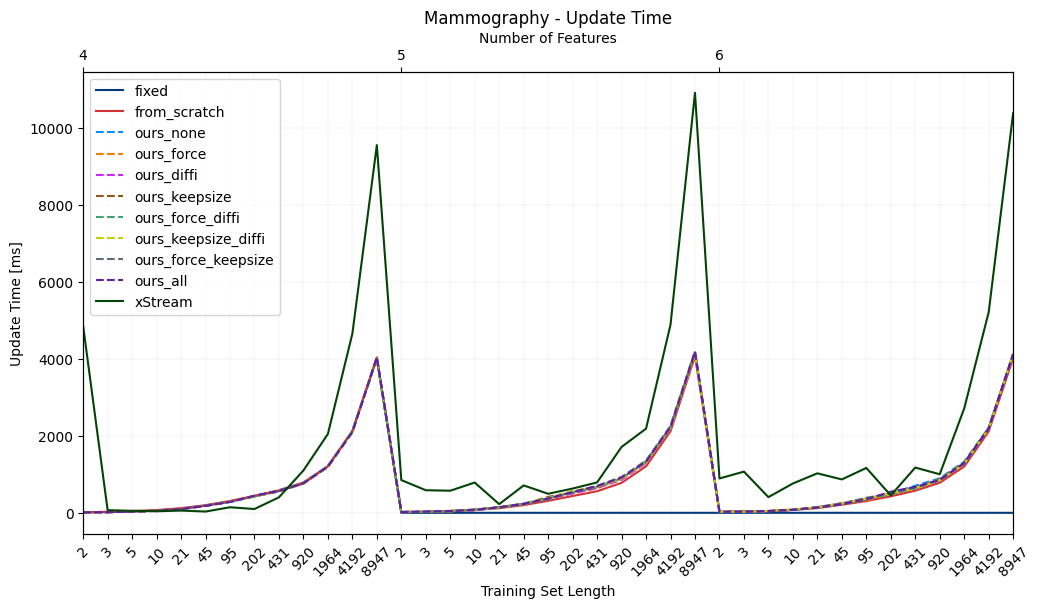

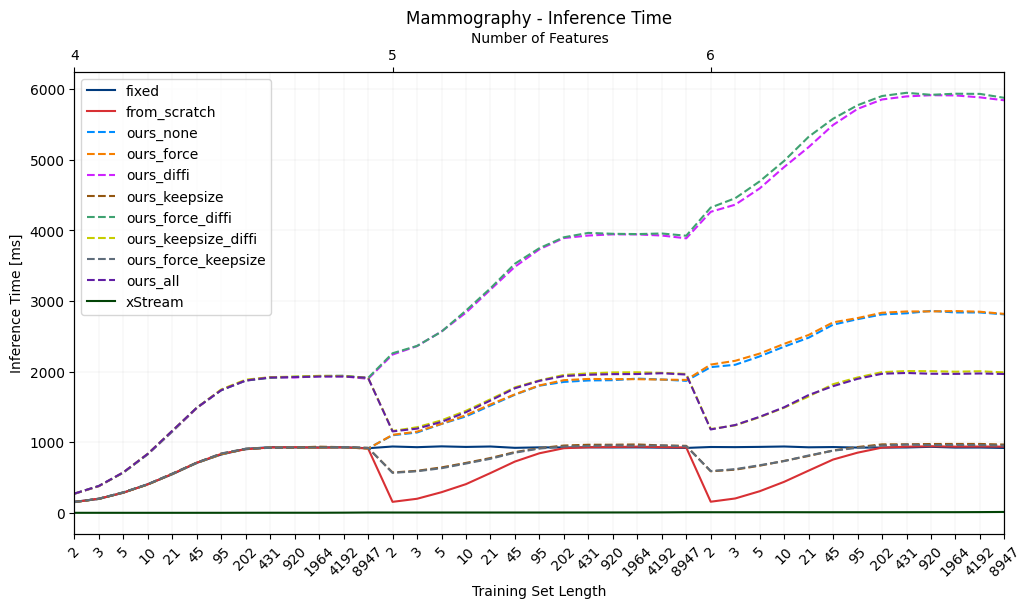

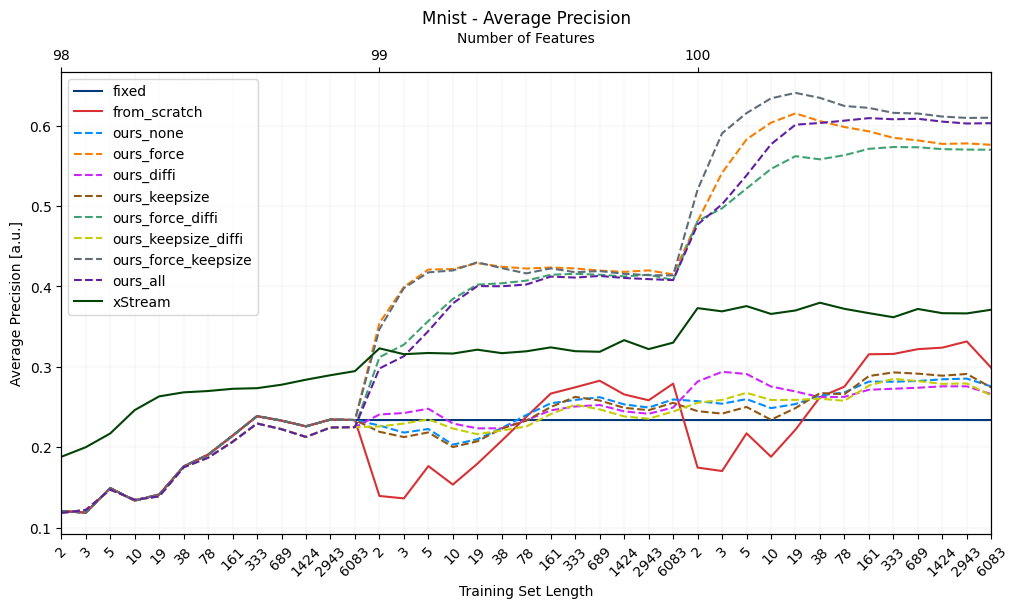

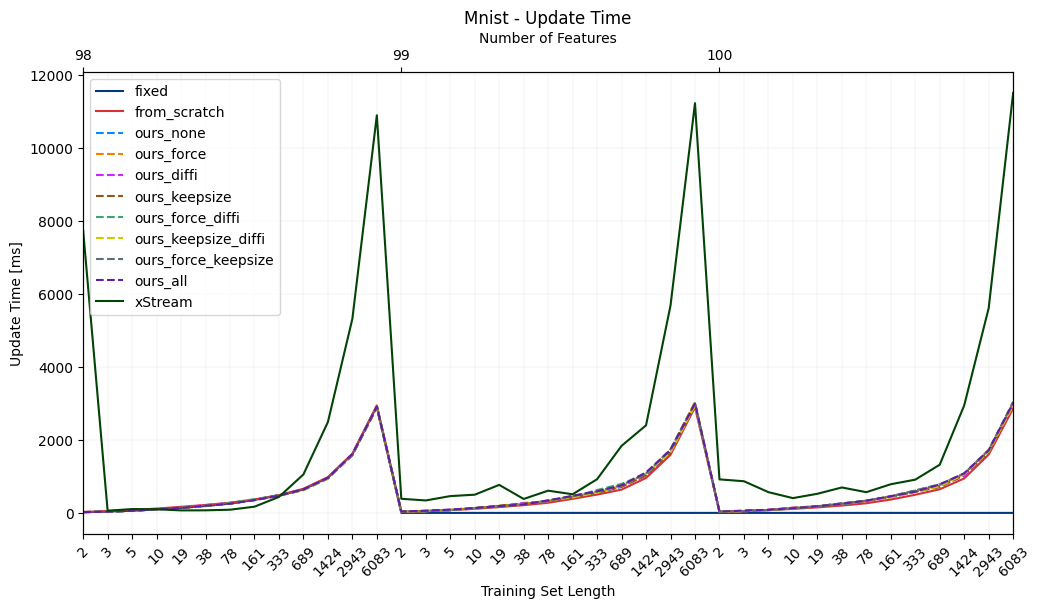

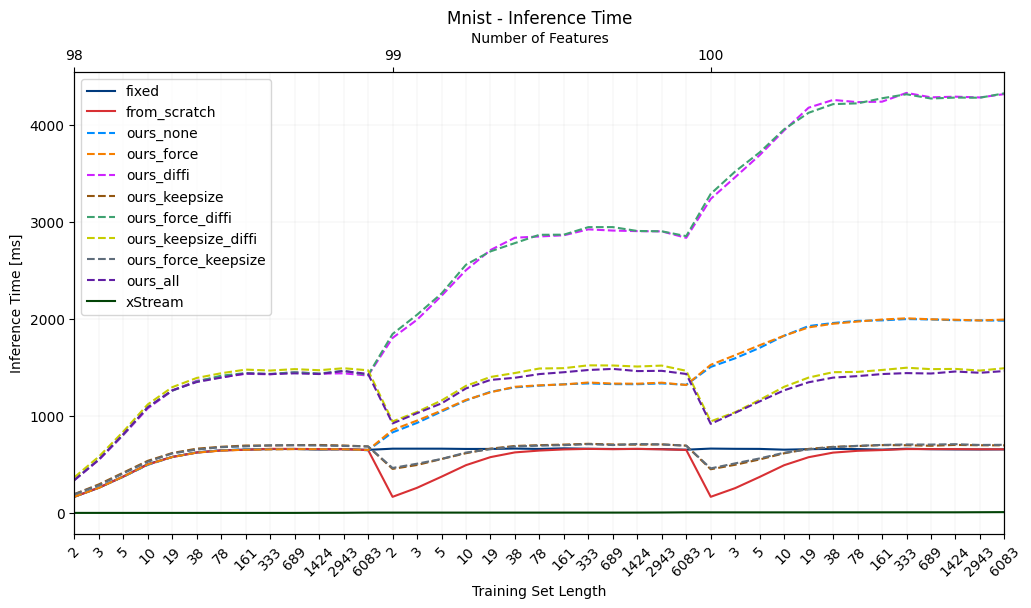

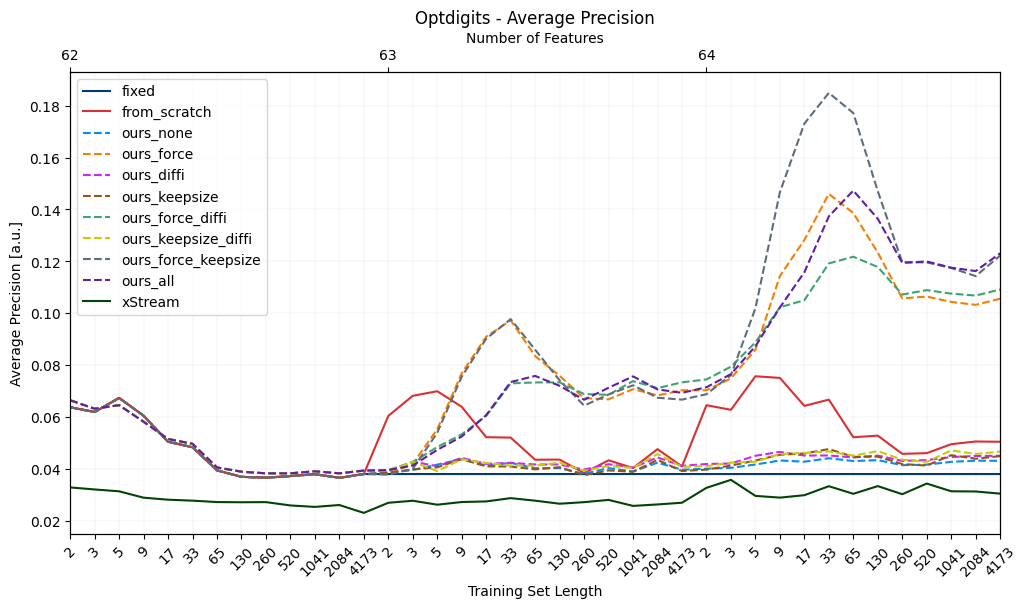

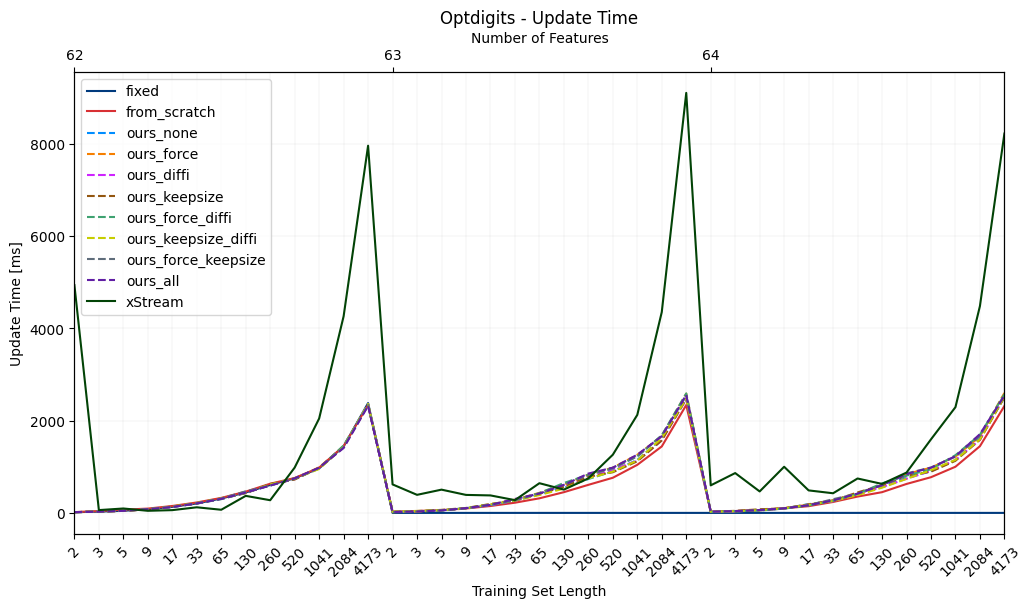

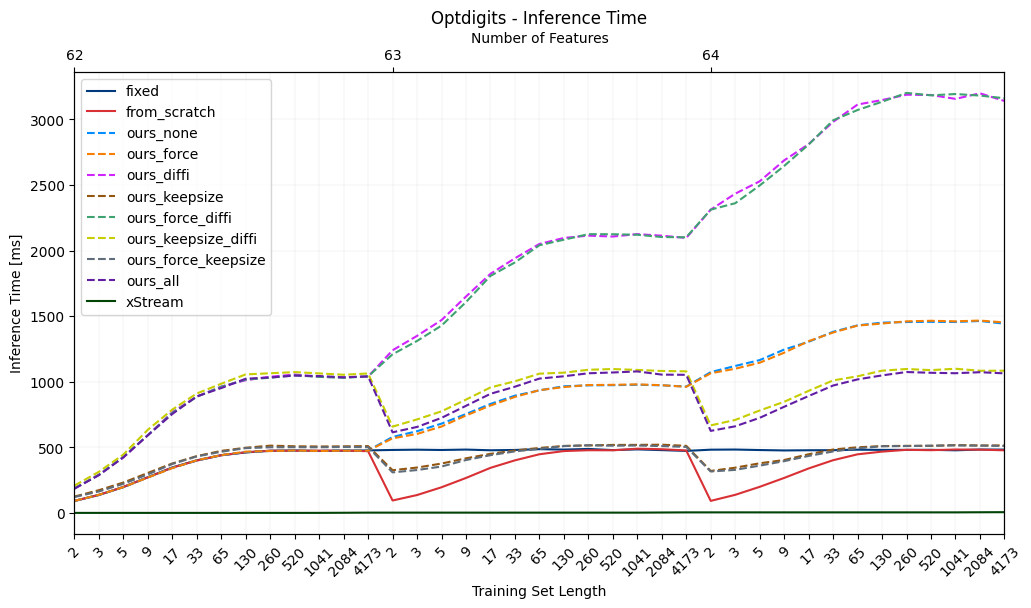

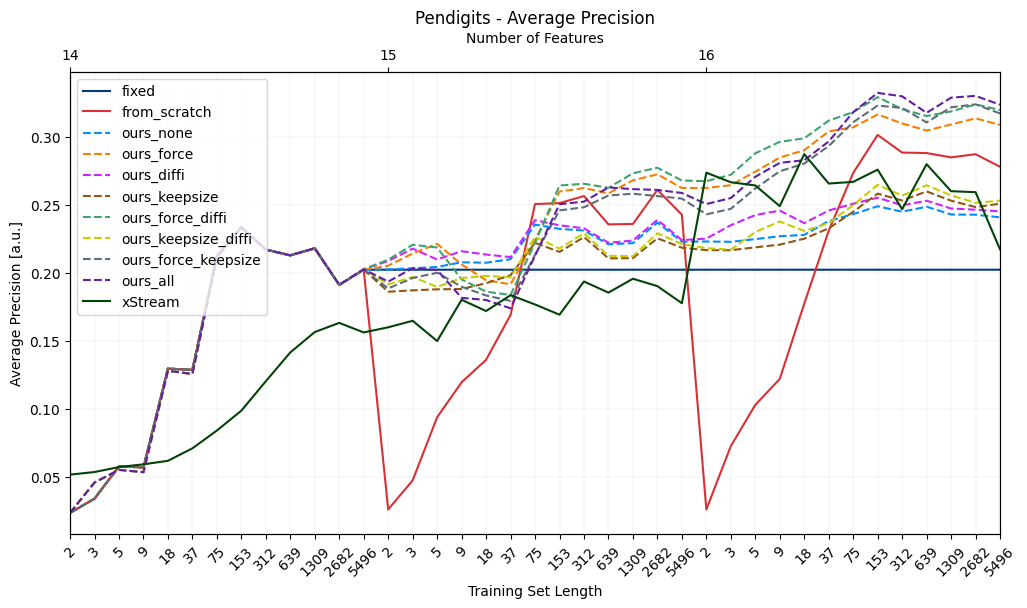

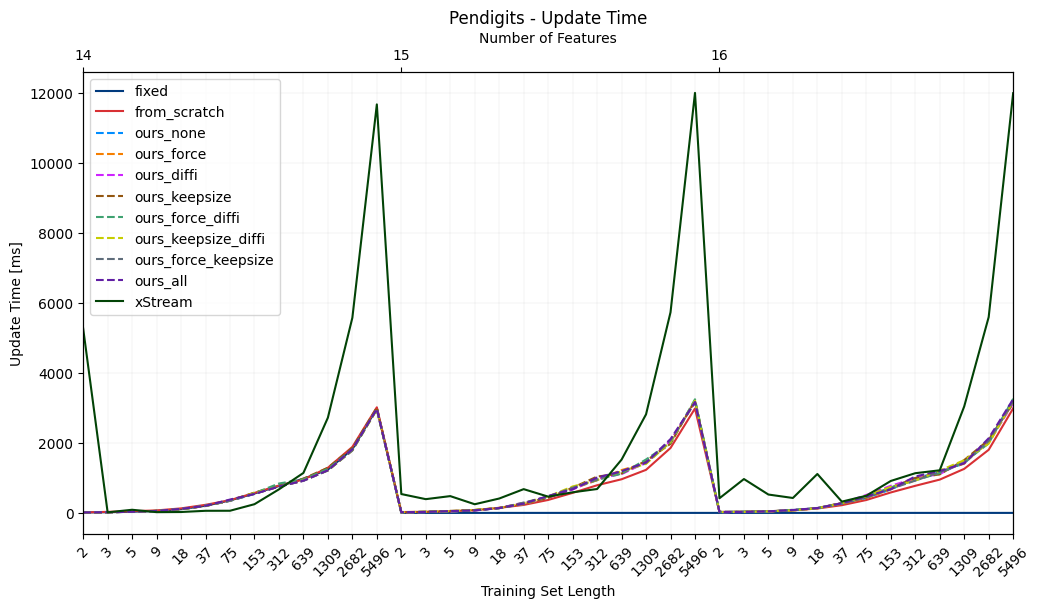

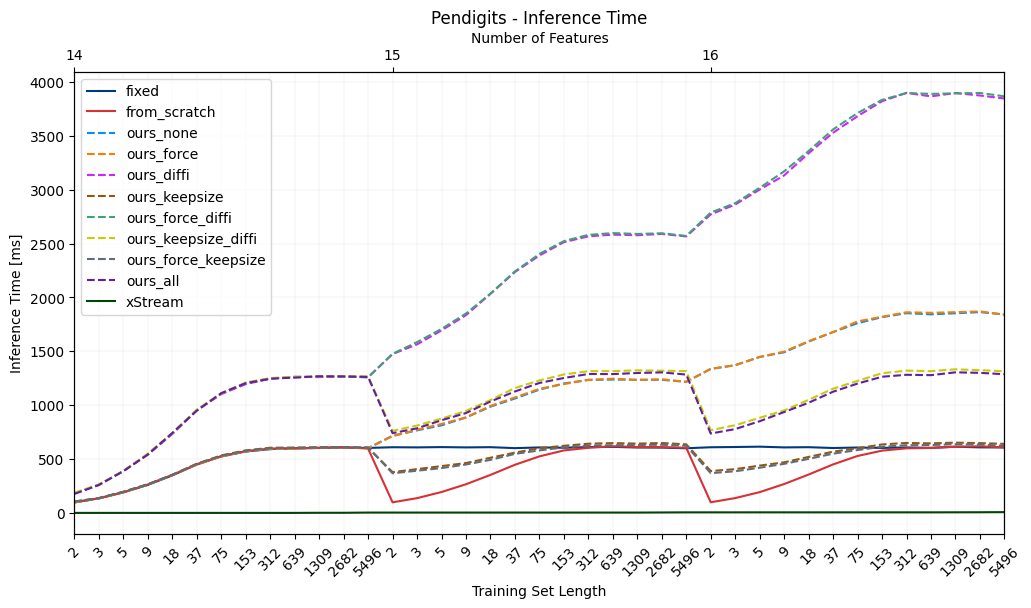

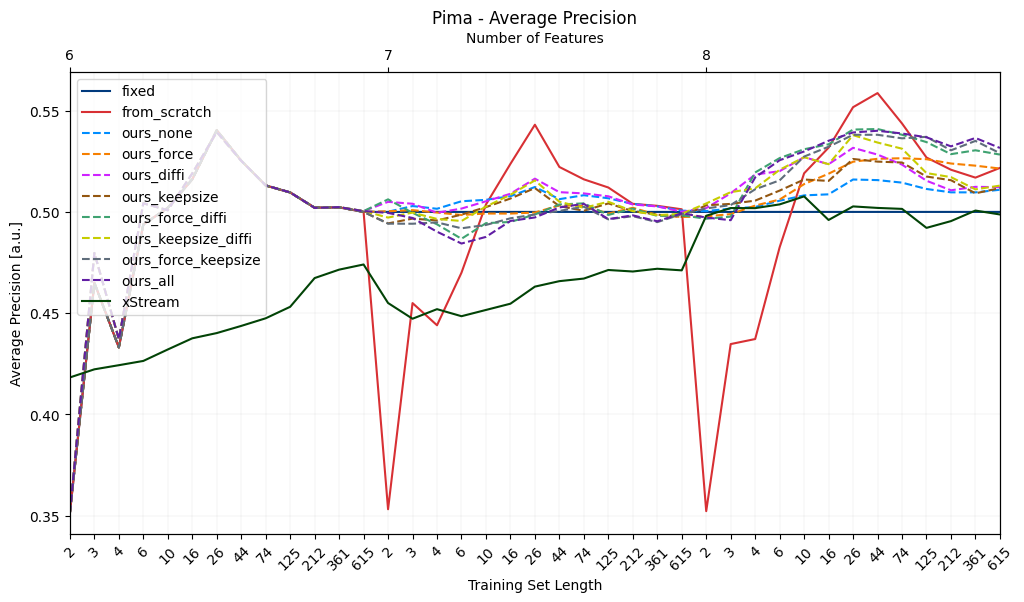

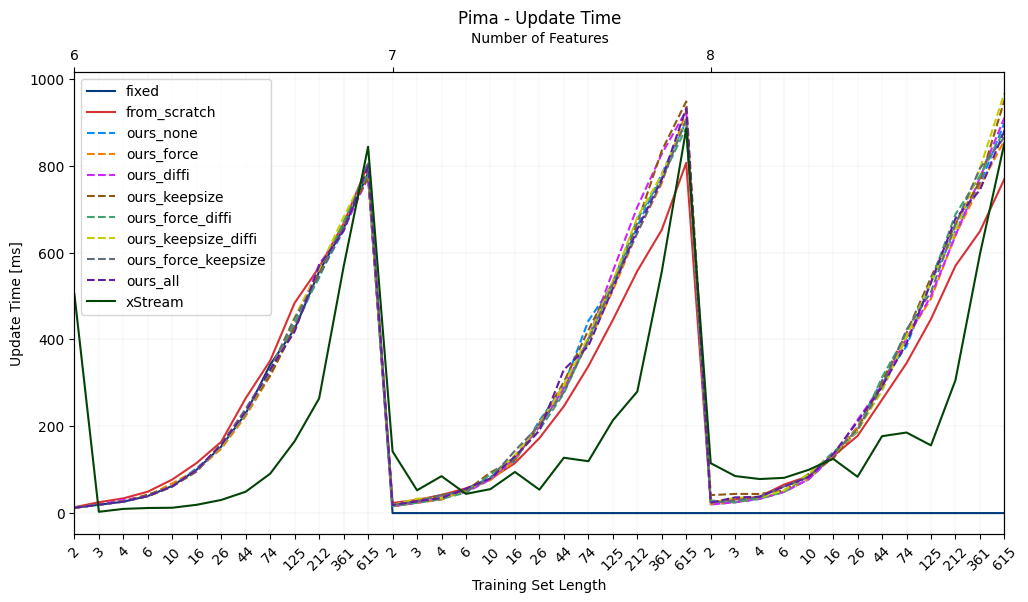

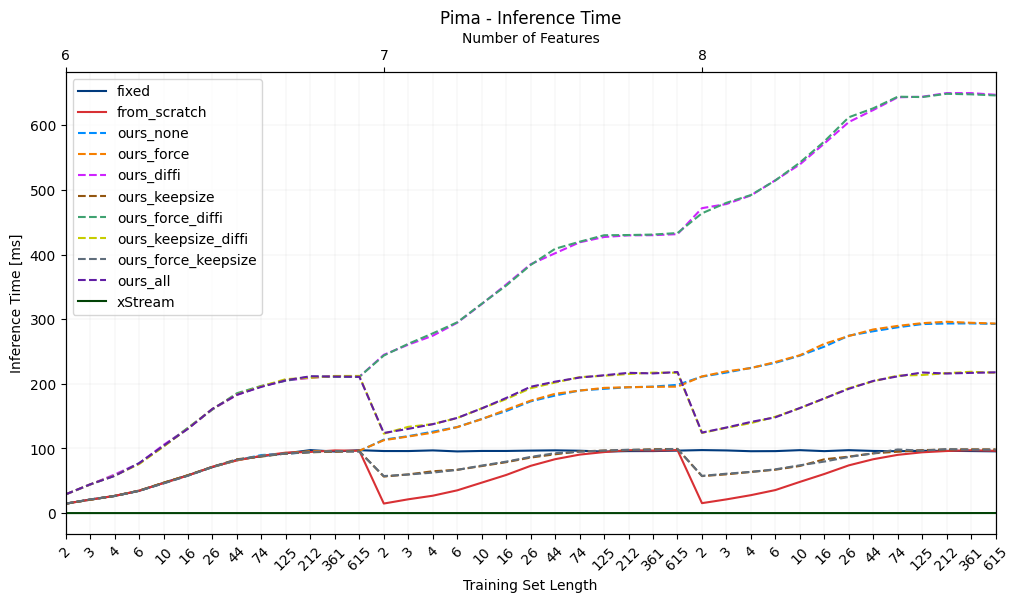

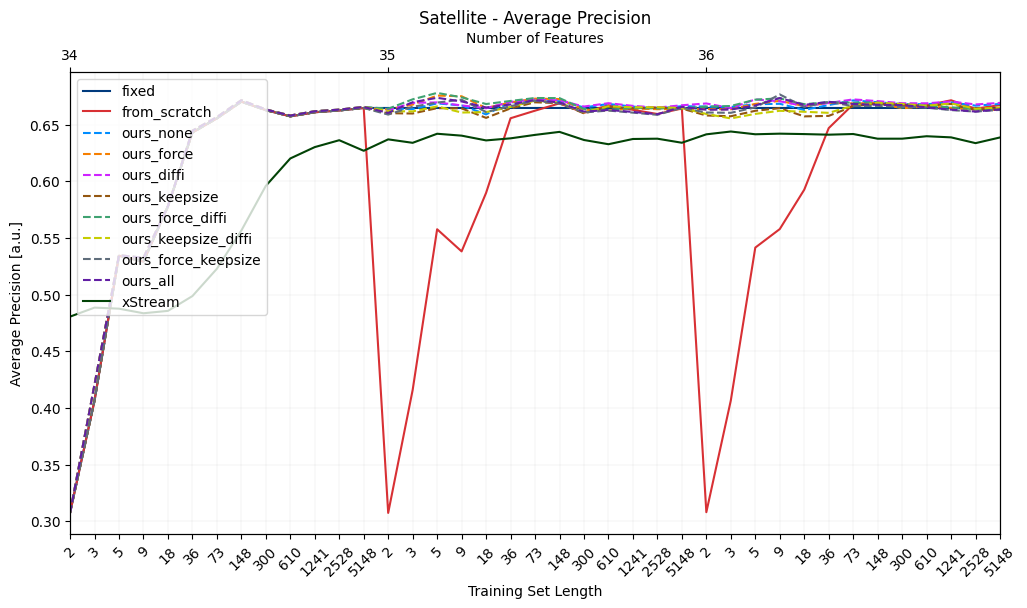

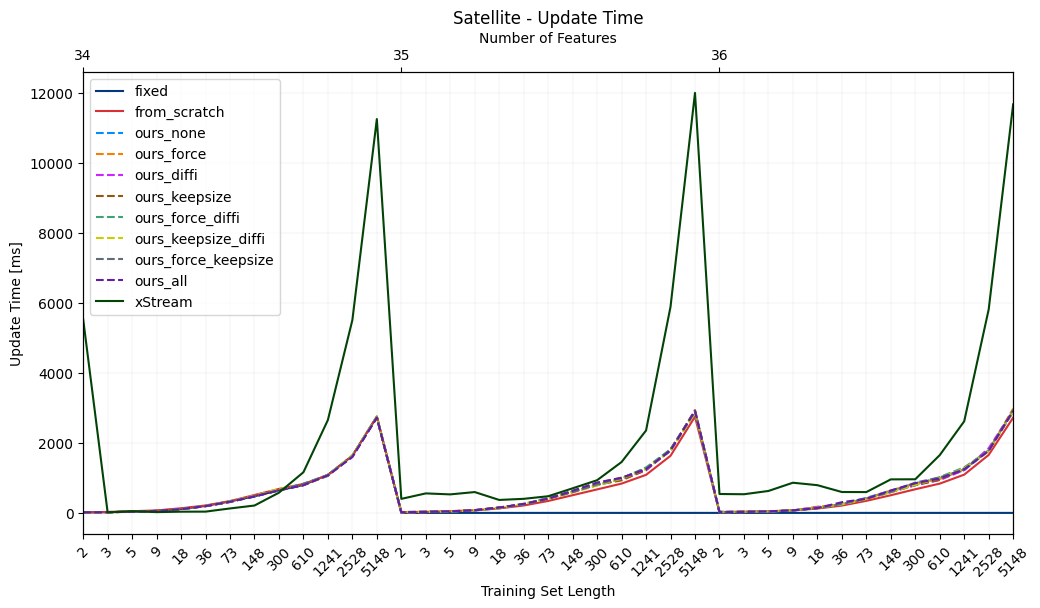

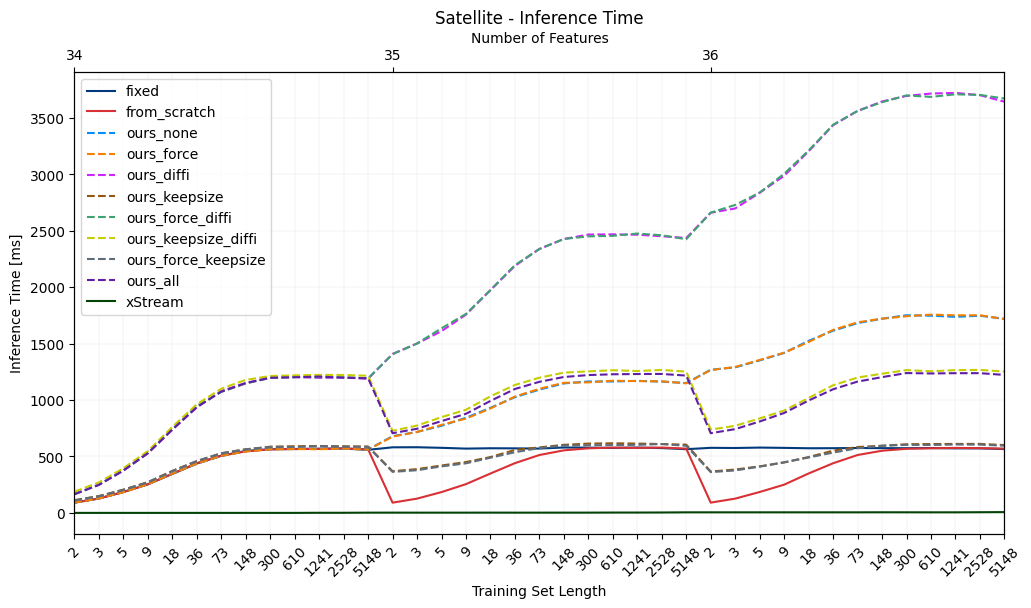

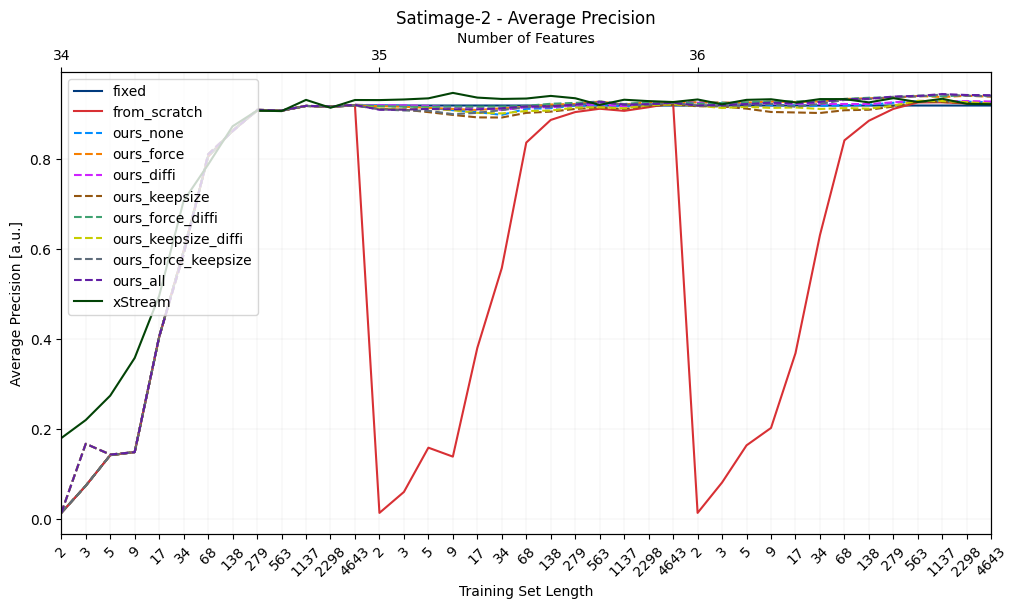

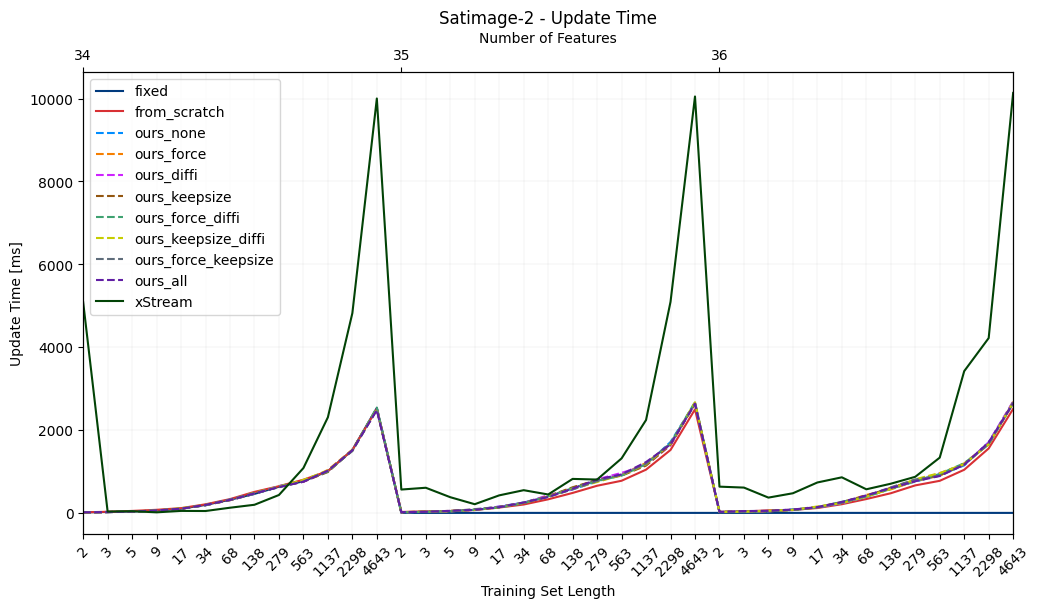

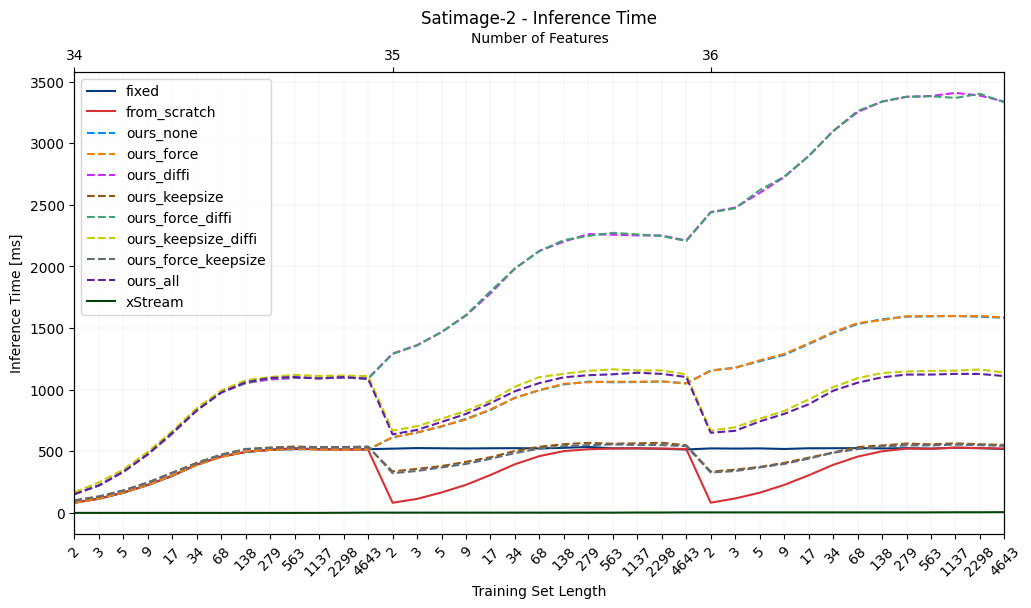

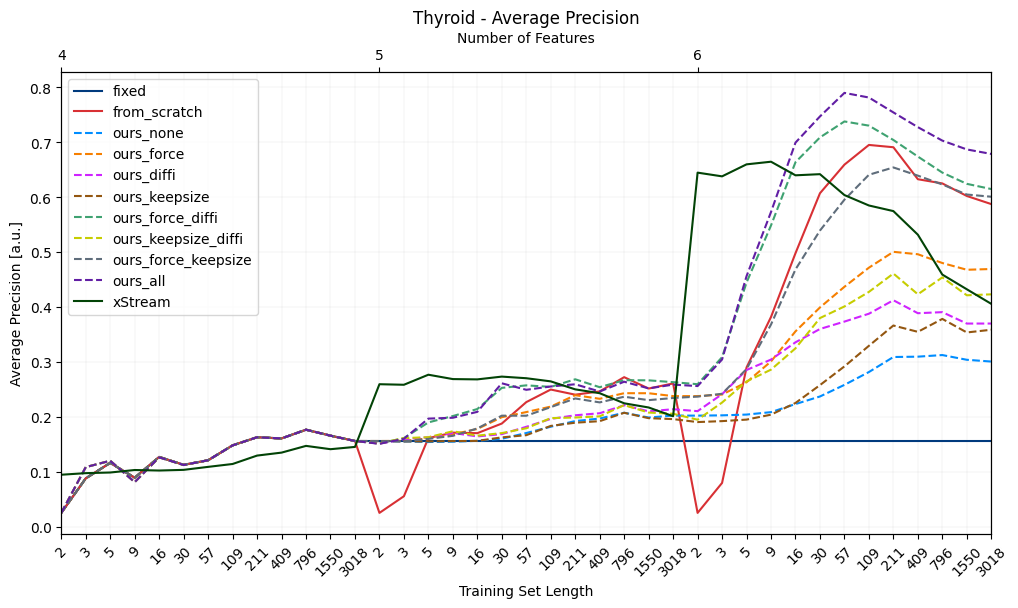

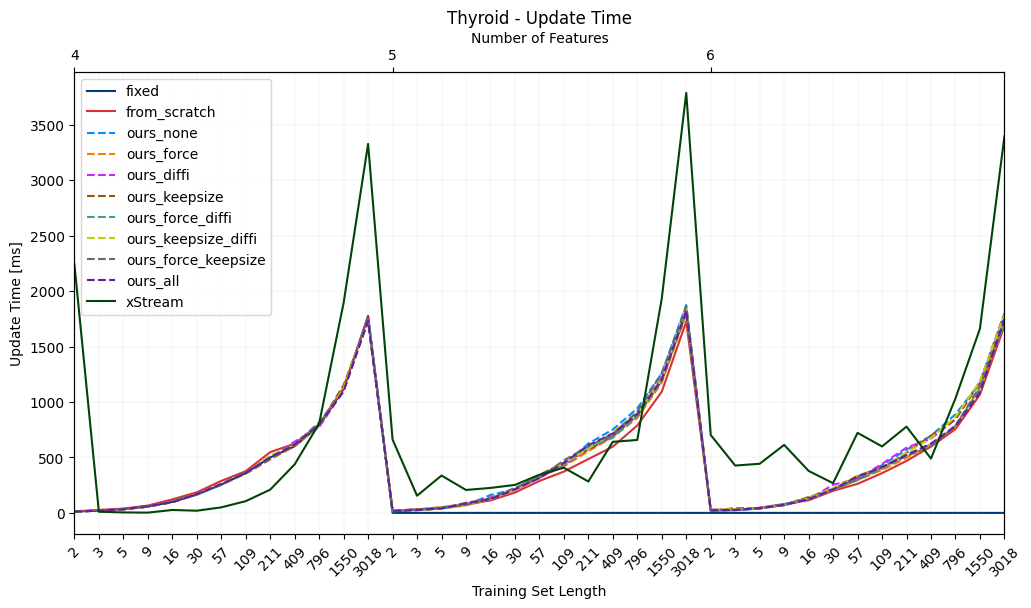

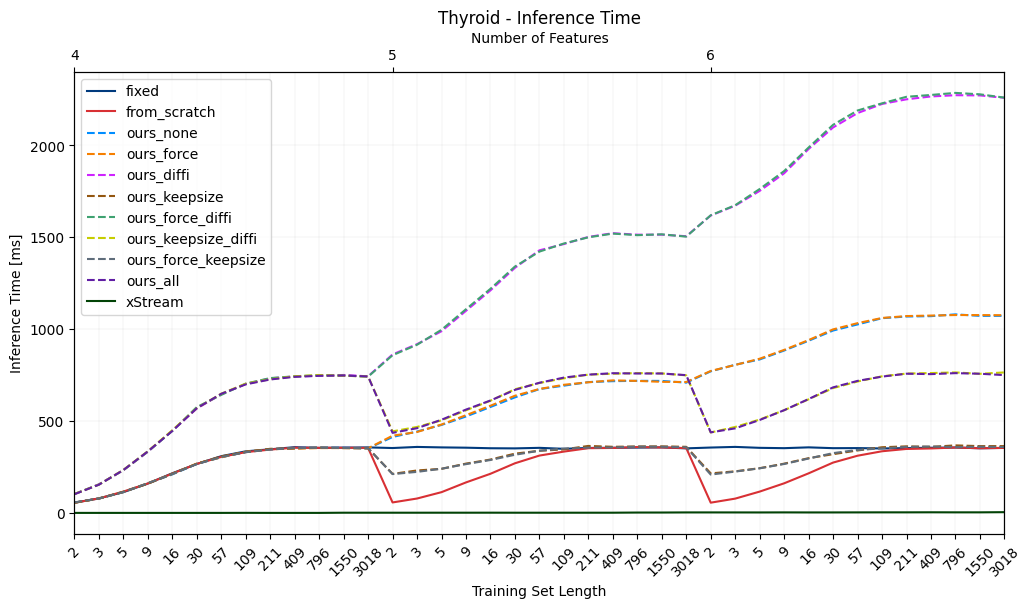

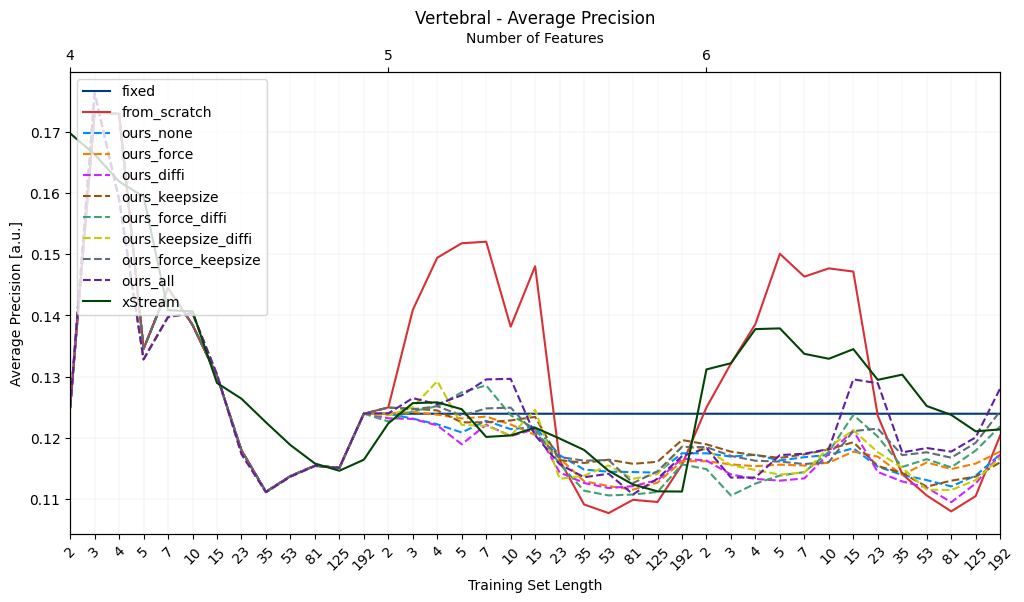

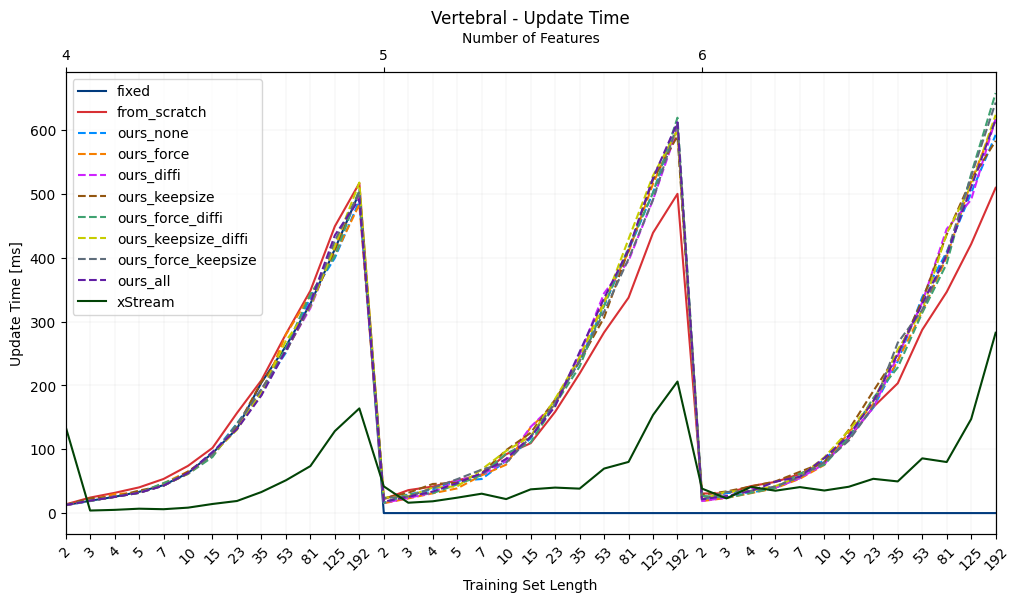

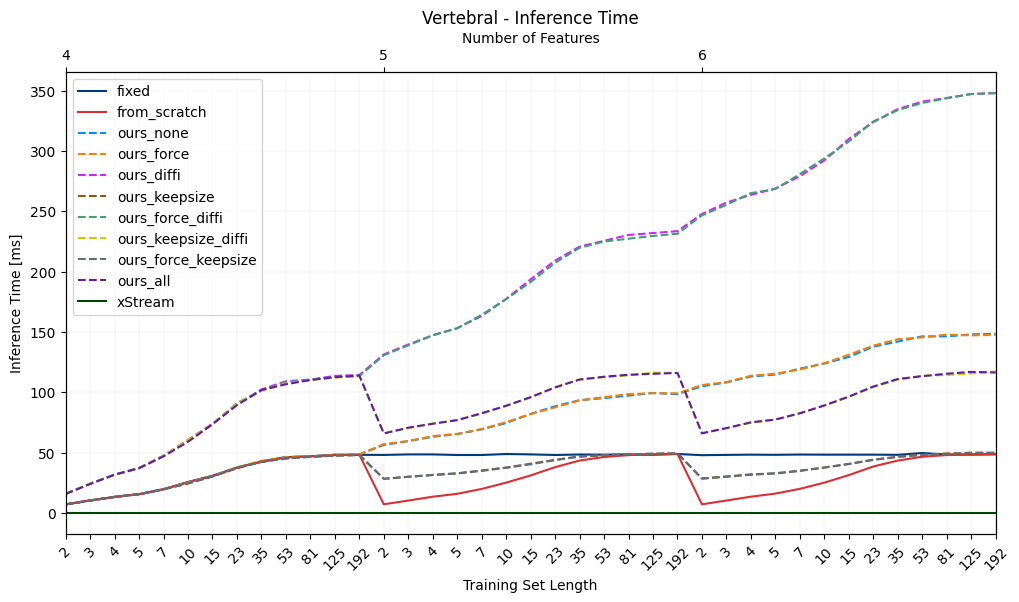

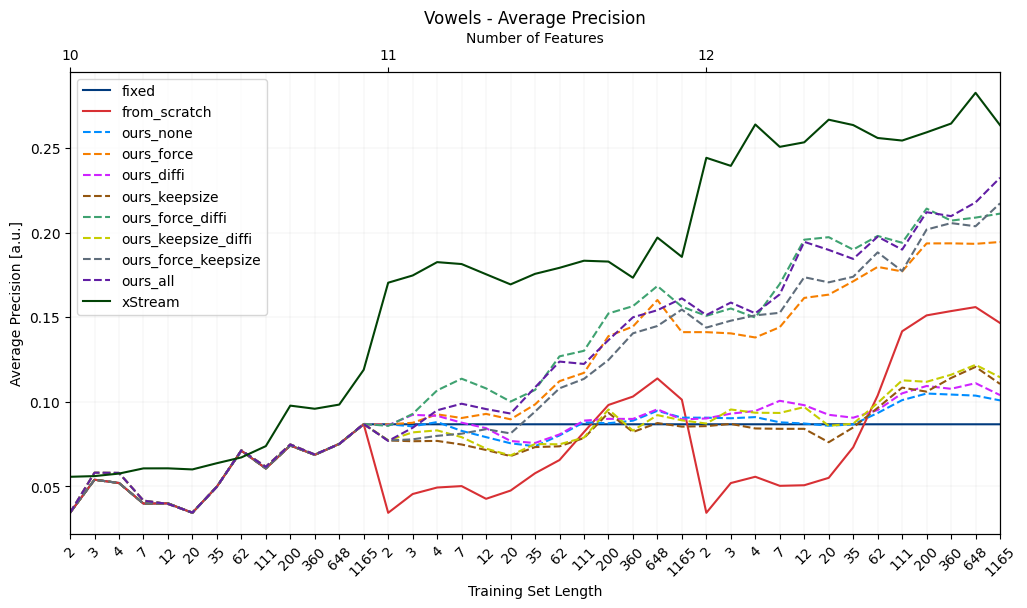

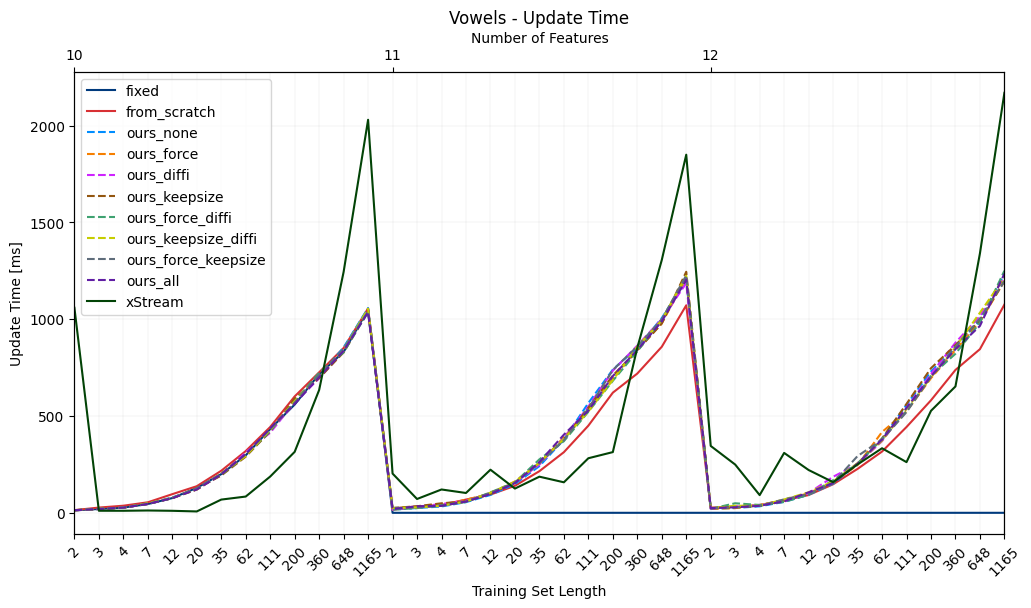

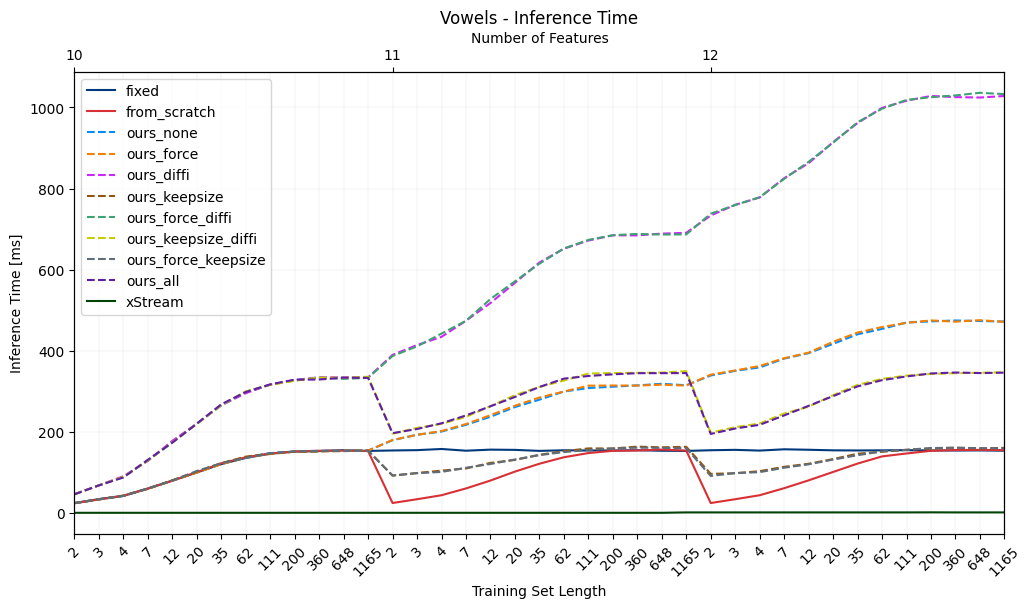

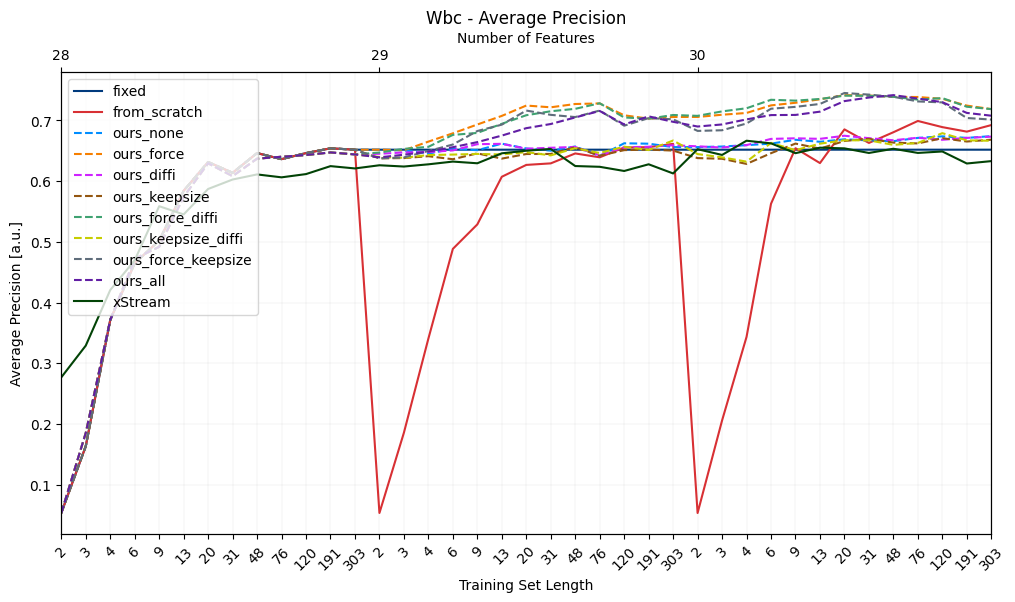

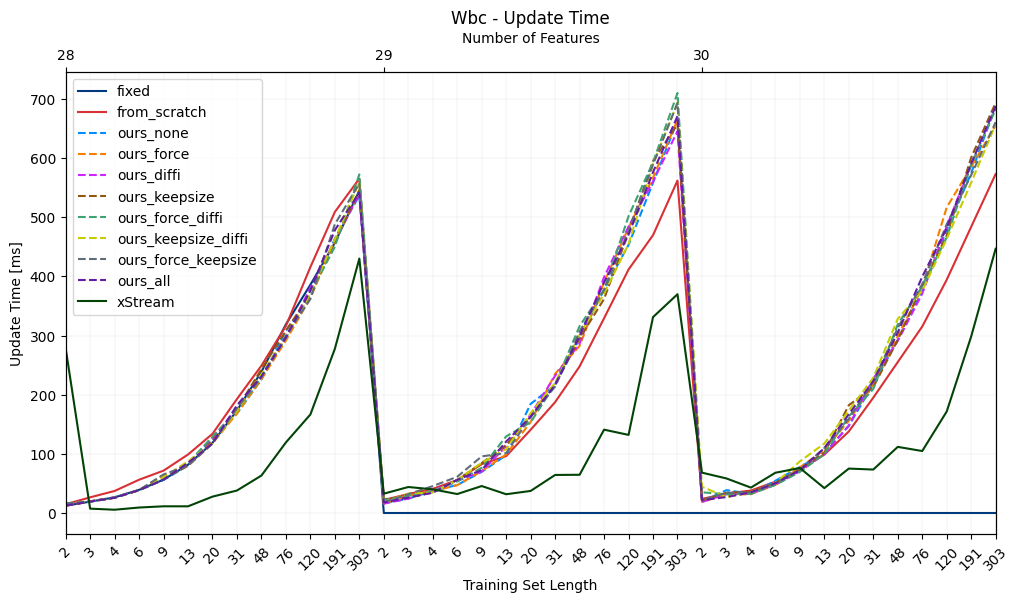

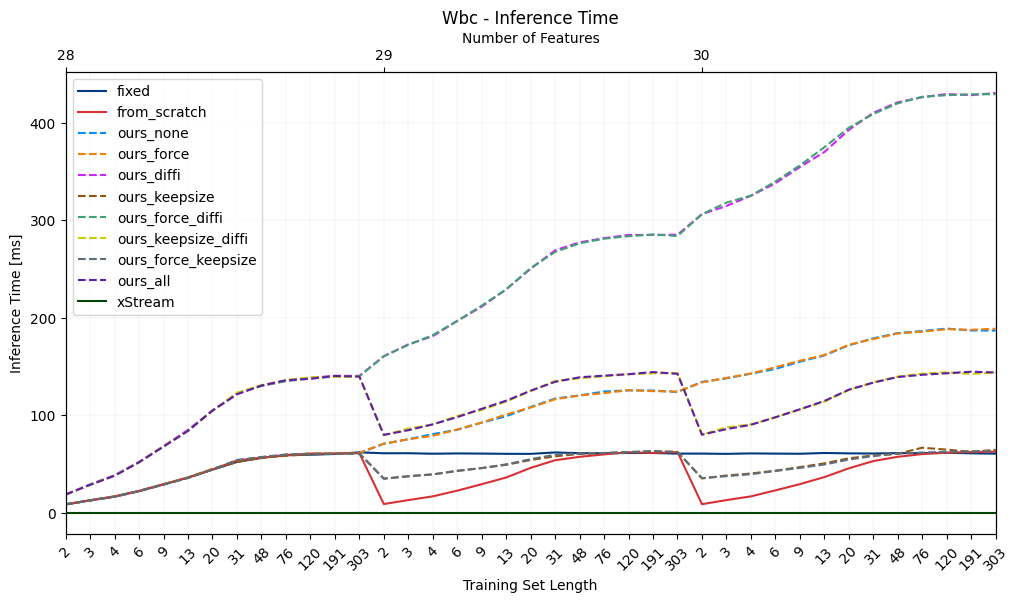

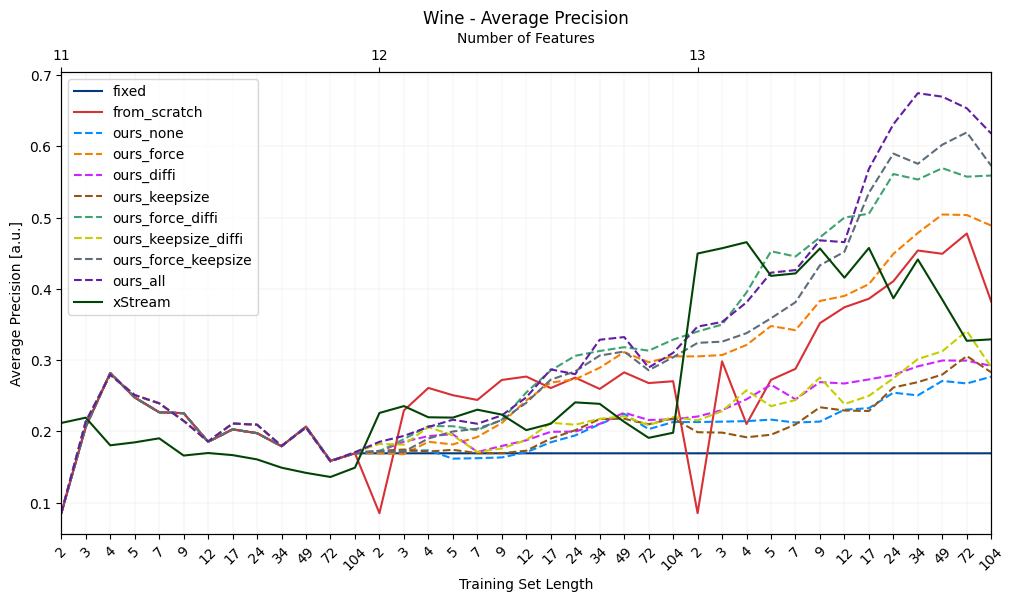

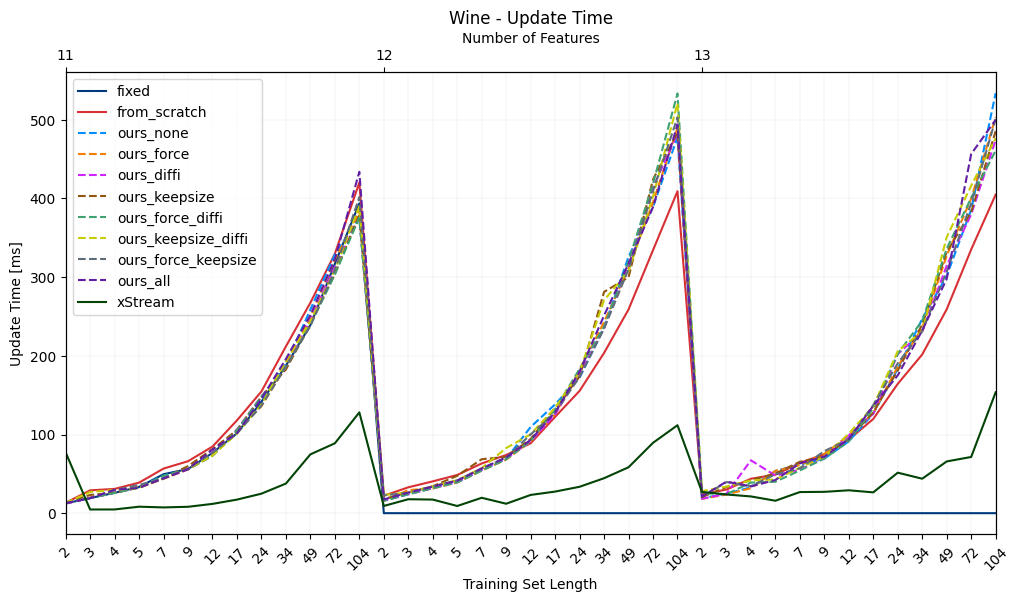

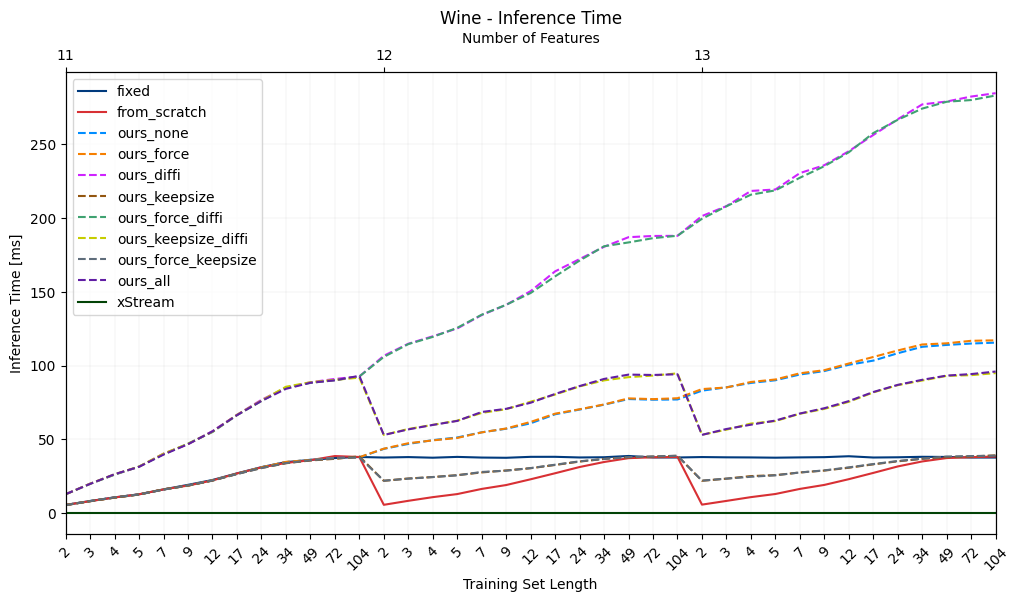

In [25]:
save_path = "average_plots"
for match in matches:
    dataset_name = os.path.basename(match).split('_results.json')[0]
    if not os.path.exists(save_path):
        os.makedirs(save_path, exist_ok=False)

    with open(match, 'r', encoding='utf-8') as f:
        result = json.load(f)
        plot_experiment_results(result, save_path, dataset_name)